In [53]:
import tensorflow as tf
import numpy as np

In [67]:
import matplotlib.pylab as plt
%matplotlib inline

In [68]:
def add_layer(X, in_size, out_size, activation_function=None):  
    W = tf.Variable(tf.random_normal([in_size, out_size])) 
    b = tf.Variable(tf.zeros([1,out_size]) + 0.1)
    y = tf.matmul(X,W) + b
    if activation_function is None:
        return y
    else:
        return activation_function(y)

In [69]:
in_size = 1
out_size = 10


In [70]:
tf.matmul(X, W)

<tf.Tensor 'MatMul_28:0' shape=(300, 10) dtype=float32>

# DUMMY DATA

In [71]:
X = np.linspace(-1,1,300).reshape((-1,1)).astype(np.float32) # 300 numbers between -1 ~ 1b
noise = np.random.normal(0, 0.05, X.shape)
y = np.square(X) - 0.5
X.shape, y.shape

((300, 1), (300, 1))

In [72]:
y = np.square(X)

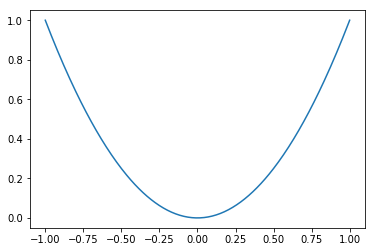

In [73]:
plt.plot(X,y)

# MODEL

In [81]:
ys = tf.placeholder(tf.float32,[None, 1])
xs = tf.placeholder(tf.float32, [None, 1])

l_1 = add_layer(xs, 1, 10, activation_function=tf.nn.relu)
ys_ = add_layer(l_1, 10, 1)

loss = tf.reduce_mean(
    tf.reduce_sum(tf.square(ys - ys_), reduction_indices=[1]))
step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

# Session

In [87]:
N_STEP = 1000


with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    for i in range(N_STEP):
        sess.run(step, feed_dict={xs: X, ys: y})
        if i%50 == 0:
            loss_current = sess.run(loss, feed_dict={xs: X, ys: y})
            print(loss_current)

0.0591182
0.00797349
0.00612644
0.0038446
0.00345501
0.00312628
0.00283586
0.00258246
0.00236429
0.0021772
0.00201806
0.00187949
0.0017589
0.00165276
0.00155927
0.00147609
0.0014017
0.00133562
0.00127444
0.00122012
